In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

In [56]:
#load csv
df = pd.read_csv("high_diamond_ranked_10min.csv")
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [4]:
#check if there are any null values in the data
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [5]:
#checking the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

In [6]:
#clean the dataset a little bit to avoid colinearity. Ex. blueKills and blue Assists, blueEliteMonsters and blueDragon, etc.
#blue side data
blue_df = df[['blueWins','blueWardsPlaced','blueWardsDestroyed','blueFirstBlood','blueKills','blueDeaths','blueDragons','blueHeralds','blueTowersDestroyed','blueTotalGold','blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled']]
blue_df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled
0,0,28,2,1,9,6,0,0,0,17210,17039,195,36
1,0,12,1,0,5,5,0,0,0,14712,16265,174,43
2,0,15,0,0,7,11,1,0,0,16113,16221,186,46
3,0,43,1,0,4,5,0,1,0,15157,17954,201,55
4,0,75,4,0,6,6,0,0,0,16400,18543,210,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,1,0,0,17765,18967,211,69
9875,1,54,0,0,6,4,1,0,0,16238,19255,233,48
9876,0,23,1,0,6,7,0,0,0,15903,18032,210,45
9877,0,14,4,1,2,3,1,0,0,14459,17229,224,48


In [7]:
#red side data
red_df = df[['blueWins','redWardsPlaced','redWardsDestroyed','redFirstBlood','redKills','redDeaths','redDragons','redHeralds','redTowersDestroyed','redTotalGold','redTotalExperience','redTotalMinionsKilled','redTotalJungleMinionsKilled']]
red_df

,blueWins,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,15,6,0,6,9,0,0,0,16567,17047,197,55
1,0,12,1,1,5,5,1,1,1,17620,17438,240,52
2,0,15,3,1,11,7,0,0,0,17285,17254,203,28
3,0,15,2,1,5,4,0,0,0,16478,17961,235,47
4,0,17,2,1,6,6,1,0,0,17404,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,46,3,0,4,7,0,0,0,15246,16498,229,34
9875,1,12,21,1,4,6,0,0,0,15456,18367,206,56
9876,0,14,0,1,7,6,1,0,0,18319,19909,261,60
9877,0,66,4,0,3,2,0,0,0,15298,18314,247,40


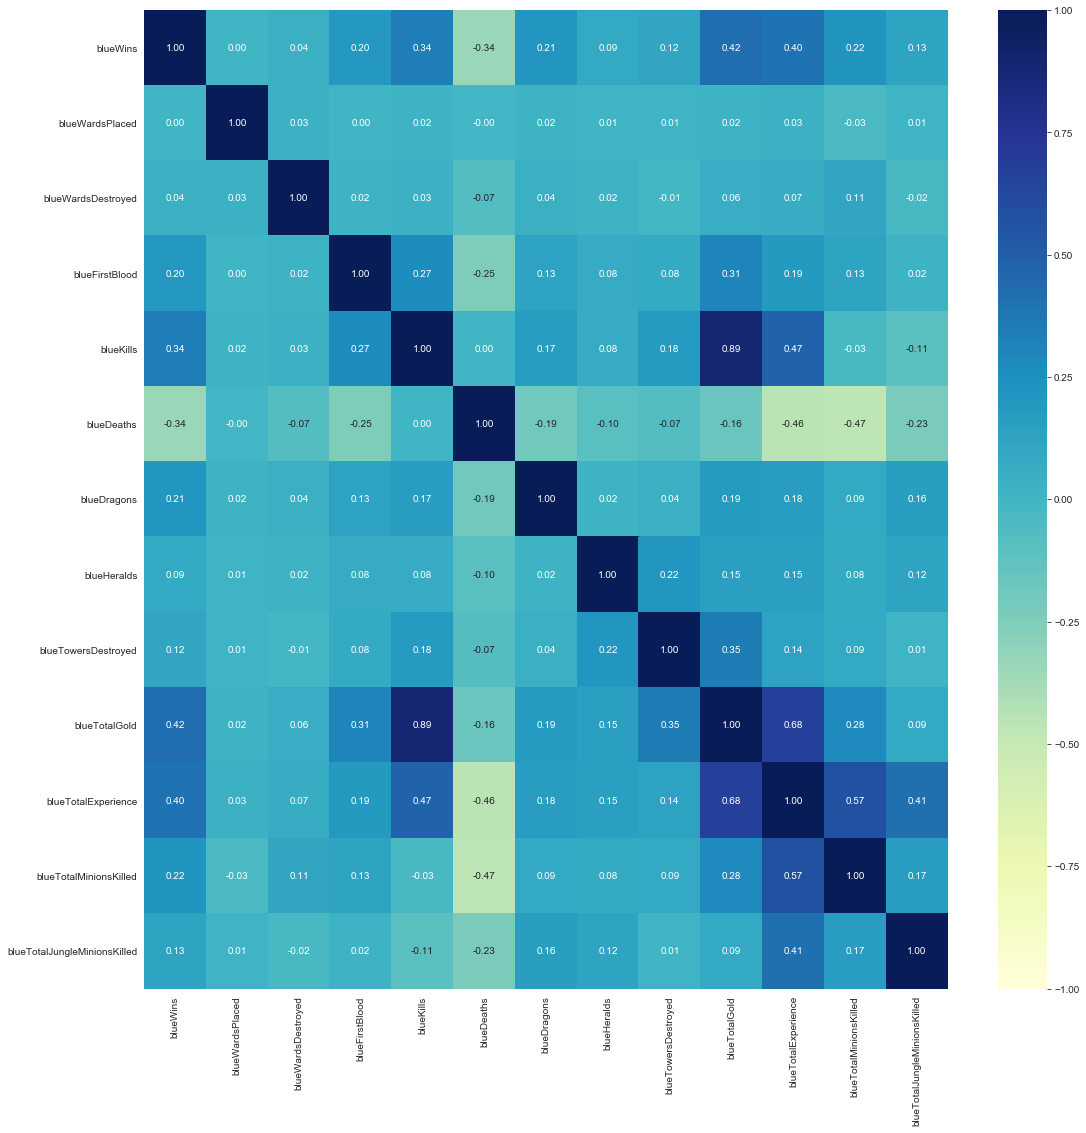

In [8]:
#use seaborn heat map to visualize correlation.
#blue side data
plt.figure(figsize=(18, 18))
sns.heatmap(blue_df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=-1);
plt.savefig("blue_corr.png")

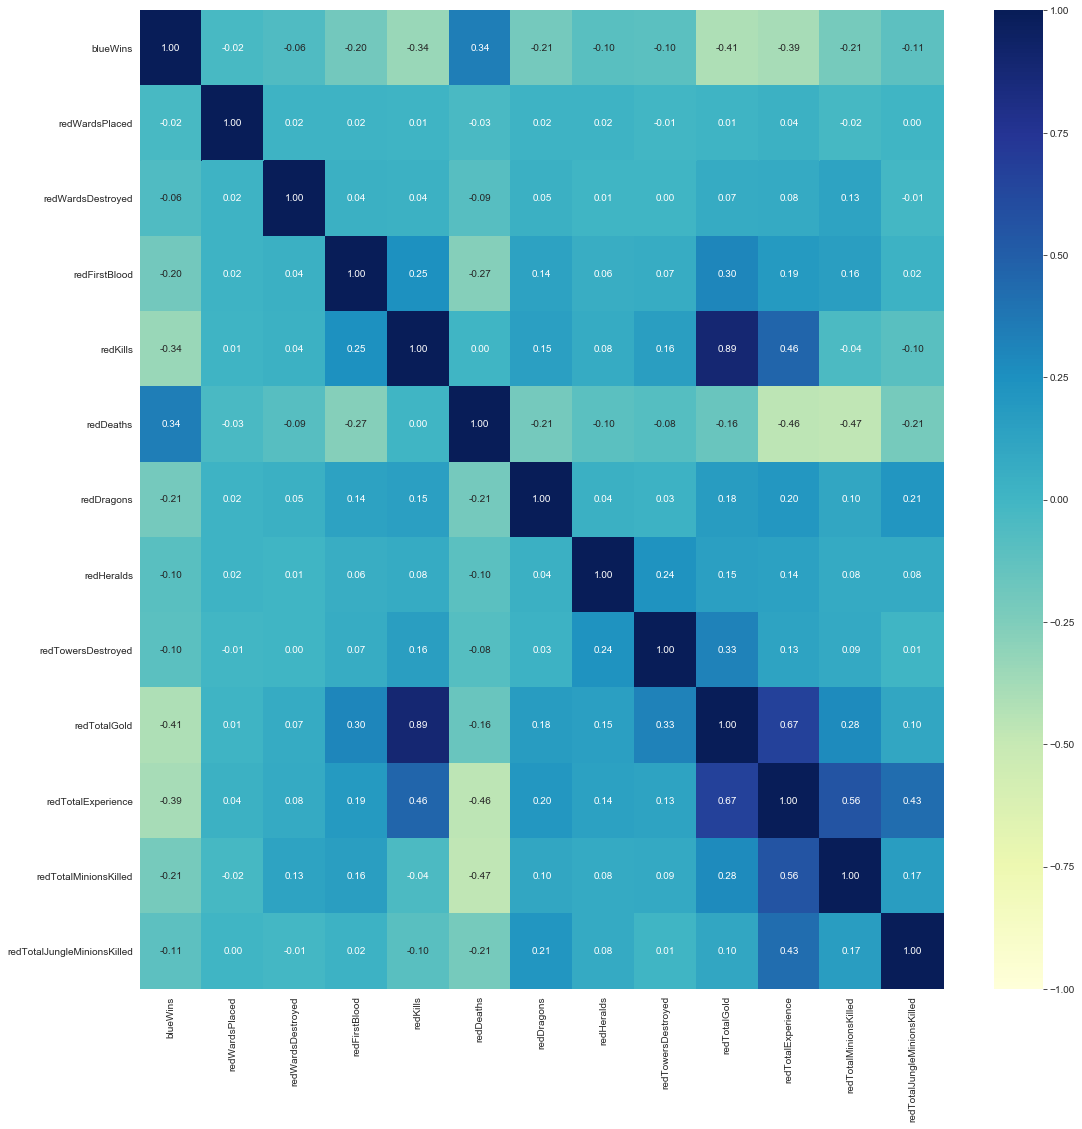

In [9]:
#red side data
plt.figure(figsize=(18, 18))
sns.heatmap(red_df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=-1);
plt.savefig("red_corr.png")

In [10]:
#keep the columns that has higher correlation (positive and negative) with blue wins
blue_corr_list = blue_df[blue_df.columns[1:]].apply(lambda x: x.corr(blue_df['blueWins']))
blue_cols = []
for col in blue_corr_list.index:
    if (blue_corr_list[col]>0.35 or blue_corr_list[col]<-0.35):
        blue_cols.append(col)
blue_cols

['blueTotalGold', 'blueTotalExperience']

In [11]:
blue_df_clean = blue_df[blue_cols]
blue_df_clean.head()

,blueTotalGold,blueTotalExperience
0,17210,17039
1,14712,16265
2,16113,16221
3,15157,17954
4,16400,18543


In [12]:
red_corr_list = red_df[red_df.columns[1:]].apply(lambda x: x.corr(red_df['blueWins']))
red_cols = []
for col in red_corr_list.index:
    if (red_corr_list[col]>0.35 or red_corr_list[col]<-0.35):
        red_cols.append(col)
red_cols

['redTotalGold', 'redTotalExperience']

In [13]:
red_df_clean = red_df[red_cols]
red_df_clean.head()

,redTotalGold,redTotalExperience
0,16567,17047
1,17620,17438
2,17285,17254
3,16478,17961
4,17404,18313


In [14]:
joined_cols = blue_cols + red_cols

In [15]:
joined_cols

['blueTotalGold', 'blueTotalExperience', 'redTotalGold', 'redTotalExperience']

In [16]:
df_clean = df[joined_cols]
df_clean.head()

,blueTotalGold,blueTotalExperience,redTotalGold,redTotalExperience
0,17210,17039,16567,17047
1,14712,16265,17620,17438
2,16113,16221,17285,17254
3,15157,17954,16478,17961
4,16400,18543,17404,18313


# Creat a Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
y = df["blueWins"].values.reshape(-1, 1)
target_names = ["blueWins", "redWins"]
X = df_clean
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [18]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((7409, 4), (2470, 4), (7409, 1), (2470, 1))

# Pre-processing

In [19]:
# Scale data
# y scale not needed as there are only 1 (blueWin) or 0 (redWin)
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model (Linear)

In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(f"Training Data Score: {linear_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {linear_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.27062070214772815
Testing Data Score: 0.2540213645254422


# Train the Model (SVM)

In [22]:
#SVM Model
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7303279794844109
Testing Data Score: 0.7186234817813765


# Hyperparameter Tuning (SVM)
#### Use GridSearchCV to tune the model's parameters

In [24]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
svm_param_grid = {'C':[1,5,10], 'gamma':[0.00001, 0.0001, 0.001]}
svm_grid = GridSearchCV(svm_model, svm_param_grid)

In [25]:
# Train the model with GridSearch
svm_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
print(svm_grid.best_params_)
print(svm_grid.best_score_)

{'C': 1, 'gamma': 1e-05}
0.7315424982755022


In [27]:
svm_predictions = svm_grid.predict(X_test_scaled)

In [28]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_predictions,
                            target_names = ["blueWins", "redWins"]))

              precision    recall  f1-score   support

    blueWins       0.72      0.71      0.72      1237
     redWins       0.72      0.72      0.72      1233

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



# Train the Model (LogisticRegression)

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
print(f"Training Data Score: {logistic_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7303279794844109
Testing Data Score: 0.7190283400809716


# Hyperparameter Tuning (LogisticRegression)
#### Use GridSearchCV to tune the model's parameters

In [31]:
logistic_param_grid = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l2','none']}
logistic_grid = GridSearchCV(logistic_model, logistic_param_grid)

In [32]:
logistic_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l2', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)

{'C': 1, 'penalty': 'l2'}
0.7308678255655761


In [34]:
logistic_predictions = logistic_grid.predict(X_test_scaled)

In [35]:
logistic_predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [36]:
# Calculate classification report
print(classification_report(y_test, logistic_predictions,
                            target_names = ["blueWins", "redWins"]))

              precision    recall  f1-score   support

    blueWins       0.72      0.72      0.72      1237
     redWins       0.72      0.72      0.72      1233

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



# KNN

k: 1, Train/Test Score: 1.000/0.642
k: 3, Train/Test Score: 0.820/0.671
k: 5, Train/Test Score: 0.780/0.683
k: 7, Train/Test Score: 0.763/0.699
k: 9, Train/Test Score: 0.761/0.703
k: 11, Train/Test Score: 0.751/0.705
k: 13, Train/Test Score: 0.753/0.708
k: 15, Train/Test Score: 0.746/0.706
k: 17, Train/Test Score: 0.747/0.709
k: 19, Train/Test Score: 0.745/0.709
k: 21, Train/Test Score: 0.742/0.709
k: 23, Train/Test Score: 0.742/0.706
k: 25, Train/Test Score: 0.739/0.713
k: 27, Train/Test Score: 0.737/0.712
k: 29, Train/Test Score: 0.739/0.715
k: 31, Train/Test Score: 0.742/0.713
k: 33, Train/Test Score: 0.740/0.713
k: 35, Train/Test Score: 0.739/0.712
k: 37, Train/Test Score: 0.737/0.713
k: 39, Train/Test Score: 0.737/0.717
k: 41, Train/Test Score: 0.738/0.719
k: 43, Train/Test Score: 0.736/0.717
k: 45, Train/Test Score: 0.736/0.715
k: 47, Train/Test Score: 0.734/0.716
k: 49, Train/Test Score: 0.735/0.718


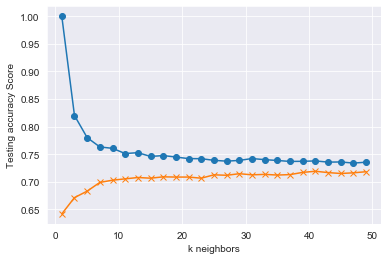

In [37]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Combining KNN with GridSearchCV

In [38]:
knn_grid = {"n_neighbors":np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv=GridSearchCV(knn,knn_grid,cv=10)

knn_cv.fit(X_train_scaled,y_train)

print("tuned hypermeter = ",knn_cv.best_params_)

print("tuned hypermeter = ",knn_cv.best_score_)

tuned hypermeter =  {'n_neighbors': 45}
tuned hypermeter =  0.7231754021227705


In [39]:
knn_predictions = knn_cv.predict(X_test_scaled)

In [40]:
# Calculate classification report
print(classification_report(y_test, knn_predictions,
                            target_names = ["blueWins", "redWins"]))

              precision    recall  f1-score   support

    blueWins       0.72      0.71      0.71      1237
     redWins       0.71      0.72      0.72      1233

    accuracy                           0.71      2470
   macro avg       0.72      0.71      0.71      2470
weighted avg       0.72      0.71      0.71      2470



# RandomForestClassfier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.697165991902834

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
grid = {"n_estimators":[100,200,300,400,500]}
rf = RandomForestClassifier()
rf_cv=GridSearchCV(rf,grid,cv=10,n_jobs = -1,verbose = 1)
rf_cv.fit(X_train_scaled,y_train)
print("tuned hypermeter = ",rf_cv.best_params_)

print("tuned hypermeter = ",rf_cv.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   35.7s finished


tuned hypermeter =  {'n_estimators': 200}
tuned hypermeter =  0.7107546412809571


In [43]:
rf_predictions = rf_cv.predict(X_test_scaled)

In [44]:
# Calculate classification report
print(classification_report(y_test, rf_predictions,
                            target_names = ["blueWins", "redWins"]))

              precision    recall  f1-score   support

    blueWins       0.71      0.70      0.70      1237
     redWins       0.70      0.71      0.70      1233

    accuracy                           0.70      2470
   macro avg       0.70      0.70      0.70      2470
weighted avg       0.70      0.70      0.70      2470



# Decision Trees

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.6299595141700405

# Neural Networks with Keras

In [46]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

number_inputs = 4
number_hidden_nodes = 10

model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 7409 samples
Epoch 1/100
7409/7409 - 1s - loss: 0.6836 - accuracy: 0.6183
Epoch 2/100
7409/7409 - 0s - loss: 0.6296 - accuracy: 0.7206
Epoch 3/100
7409/7409 - 0s - loss: 0.5850 - accuracy: 0.7259
Epoch 4/100
7409/7409 - 0s - loss: 0.5550 - accuracy: 0.7275
Epoch 5/100
7409/7409 - 0s - loss: 0.5428 - accuracy: 0.7275
Epoch 6/100
7409/7409 - 0s - loss: 0.5377 - accuracy: 0.7317
Epoch 7/100
7409/7409 - 0s - loss: 0.5359 - accuracy: 0.7315
Epoch 8/100
7409/7409 - 0s - loss: 0.5348 - accuracy: 0.7309
Epoch 9/100
7409/7409 - 0s - loss: 0.5346 - accuracy: 0.7307
Epoch 10/100
7409/7409 - 0s - loss: 0.5342 - accuracy: 0.7290
Epoch 11/100
7409/7409 - 0s - loss: 0.5347 - accuracy: 0.7271
Epoch 12/100
7409/7409 - 0s - loss: 0.5340 - accuracy: 0.7284
Epoch 13/100
7409/7409 - 0s - loss: 0.5333 - accuracy: 0.7298
Epoch 14/100
7409/7409 - 0s - loss: 0.5334 - accuracy: 0.7297
Epoch 15/100
7409/7409 - 0s - loss: 0.5334 - accuracy: 0.7297
Epoch 16/100
7409/7409 - 0s - loss: 0.5336 - accuracy: 0.

In [51]:
# Evaluate the model using the training data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2470/2470 - 0s - loss: 0.5454 - accuracy: 0.7219
Loss: 0.5453802993181746, Accuracy: 0.7218623757362366


# Deep Learning

In [52]:
deep_model = Sequential()

number_inputs = 4
number_hidden_nodes = 10

deep_model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

deep_model.add(Dense(units=number_hidden_nodes, activation='relu'))

number_classes = 2
deep_model.add(Dense(units=number_classes, activation='softmax'))

In [53]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [54]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 7409 samples
Epoch 1/100
7409/7409 - 1s - loss: 0.6449 - accuracy: 0.6659
Epoch 2/100
7409/7409 - 0s - loss: 0.5534 - accuracy: 0.7183
Epoch 3/100
7409/7409 - 0s - loss: 0.5390 - accuracy: 0.7240
Epoch 4/100
7409/7409 - 0s - loss: 0.5377 - accuracy: 0.7268
Epoch 5/100
7409/7409 - 0s - loss: 0.5381 - accuracy: 0.7237
Epoch 6/100
7409/7409 - 0s - loss: 0.5358 - accuracy: 0.7278
Epoch 7/100
7409/7409 - 0s - loss: 0.5354 - accuracy: 0.7295
Epoch 8/100
7409/7409 - 0s - loss: 0.5352 - accuracy: 0.7264
Epoch 9/100
7409/7409 - 0s - loss: 0.5344 - accuracy: 0.7297
Epoch 10/100
7409/7409 - 0s - loss: 0.5356 - accuracy: 0.7283
Epoch 11/100
7409/7409 - 0s - loss: 0.5345 - accuracy: 0.7251
Epoch 12/100
7409/7409 - 0s - loss: 0.5343 - accuracy: 0.7249
Epoch 13/100
7409/7409 - 0s - loss: 0.5348 - accuracy: 0.7271
Epoch 14/100
7409/7409 - 0s - loss: 0.5356 - accuracy: 0.7261
Epoch 15/100
7409/7409 - 0s - loss: 0.5348 - accuracy: 0.7272
Epoch 16/100
7409/7409 - 0s - loss: 0.5341 - accuracy: 0.

In [55]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

2470/2470 - 0s - loss: 0.5450 - accuracy: 0.7202
Deep Neural Network - Loss: 0.5450253473361012, Accuracy: 0.7202429175376892
